In [1]:
# -*- coding: utf8

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.linalg as LA

from collections import Counter
from scipy.sparse.csgraph import connected_components
from scipy.sparse.csgraph import laplacian
from sklearn.cluster import SpectralClustering

plt.ion()

In [2]:
S = np.load('/Users/flaviovdf/Downloads/sim.npz')['arr_0']

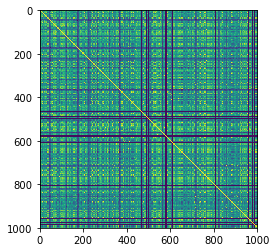

In [3]:
plt.imshow(S[:1000, :1000])

In [4]:
S = S[5748:, 5748:]
df = pd.read_excel('../logs_tabelas/DADOS_SANTIAGOS_COMPLETO.xlsx')
df = df.loc[5748:]

S[S < 0] = 0
S[S > 1] = 1
NZ = S > 0
_, components = connected_components(NZ, directed=False)
components = np.array(components)

perguntas = np.array([str(x) for x in df['PERGUNTA'].values])

c = Counter(components)
giant = c.most_common(1)[0][0]
labels = np.zeros(S.shape[0], dtype='i') - 1
labels[components != giant] = -1

S = S[components == giant]
S = S[:, components == giant]
model = SpectralClustering(n_clusters=32, affinity='precomputed')
model.fit(S)
labels[components == giant] = np.array(model.labels_)

for k in range(32):
    print(perguntas[labels == k][:20])
    print()

['Qual seu sabor de cha favorito?' 'Qual seu sobrenome capitu?'
 'Qual seu vestido preferido?' 'Qual mar?' 'Qual o prato' 'Qual meu nome?'
 'Qual o sentido da vida?' 'Qual o seu nome?' 'Qual seu problema?'
 'Qual o sentido do amor.' 'Qual o sentido da vida?' 'Qual é meu nome'
 'Qual o seu signo?' 'Seu bosta' 'Qual o prqto do dia?'
 'Qual é o seu primeiro nome?' 'Qual o motivo deste encontro'
 'Qual seu melhor aliado' 'Qual sua profissão?' 'Qual o seu signo?']

['Como vocês estão' 'TRAIU OU NÃO BENTINHO?' 'Traiu ou não?'
 'Capitu traiu ou nao traiu' 'Não' 'Não' 'Não'
 'Não, obrigada! Gostaria de saber se voce traiu Bentinho....'
 'Fico sem palavra' 'Traiu ou nao traiu?' 'Não fez sentido sua resposta.'
 'Quais são suas maiores ambiçoēs?' 'Biscoito ou bolacha?'
 'Vc é talarico ou não,  parça?' 'Afinal você traiu bentinho ou não?'
 ' I 6fu7ew21saz' 'Traiu ou não traiu, Capitu?' 'Não saia' 'Não tem chá?'
 'A revolução será feminista ou não será?']

['Por que você ficou conhecido como Dom Ca

In [5]:
L = laplacian(S[:1000, :1000])
e = np.linalg.eigvalsh(L)

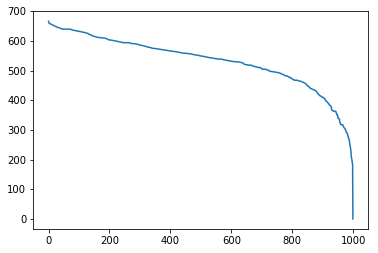

In [6]:
plt.plot(e[::-1])